# DAY-AHEAD DATA EXPLORATION

## Tested on ENTSO-E data from 24/01/2025
- Prices
- Load
- Generation
--> hourly granularity

Note: how to explode to every day of the year on multiple years?

In [ ]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt

repo_root = Path("..").resolve()
sys.path.append(str(repo_root))

#Load price data test
from Source.load_data import load_day_ahead_test

energy_prices_test = load_day_ahead_test()

#Load load data test
from Source.load_data import load_load_test

load_test = load_load_test()

df_avg_actual = (
    load_test
    .groupby(load_test.index // 4)["Actual Total Load (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_avg_forecast = (
    load_test
    .groupby(load_test.index // 4)["Day-ahead Total Load Forecast (MW)"]
    .mean()
    .reset_index(drop=True)
)

#Load generation data test
from Source.load_data import load_offshore_wind_test
from Source.load_data import load_offshore_wind_test
from Source.load_data import load_solar_test

onshore_test = load_onshore_wind_test()
offshore_test = load_offshore_wind_test()
solar_test = load_solar_test()

df_onshore_test_actual = (
    onshore_test
    .groupby(onshore_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_onshore_test_forecast = (
    onshore_test
    .groupby(onshore_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_onshore_test_actual = (
    onshore_test
    .groupby(onshore_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_onshore_test_forecast = (
    onshore_test
    .groupby(onshore_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_offshore_test_actual = (
    offshore_test
    .groupby(offshore_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_offshore_test_forecast = (
    offshore_test
    .groupby(offshore_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_solar_test_actual = (
    solar_test
    .groupby(solar_test.index // 4)["Actual (MW)"]
    .mean()
    .reset_index(drop=True)
)

df_solar_test_forecast = (
    solar_test
    .groupby(solar_test.index // 4)["Day-ahead (MW)"]
    .mean()
    .reset_index(drop=True)
)

energy_prices_test.insert(3,'Actual Total Load (MW)',df_avg_actual)
energy_prices_test.insert(4,'Day-ahead Total Load Forecast (MW)',df_avg_forecast)
energy_prices_test.insert(5,'Day-ahead Onshore Wind Actual (MW)',df_onshore_test_actual)
energy_prices_test.insert(6,'Day-ahead Offshore Wind Actual (MW)',df_offshore_test_actual)
energy_prices_test.insert(7,'Day-ahead Solar Actual (MW)',df_solar_test_actual)
energy_prices_test.insert(8,'Day-ahead Onshore Wind Forecast (MW)',df_onshore_test_forecast)
energy_prices_test.insert(9,'Day-ahead Offshore Wind Forecast (MW)',df_offshore_test_forecast)
energy_prices_test.insert(10,'Day-ahead Solar Forecast (MW)',df_solar_test_forecast)



df_market_focus = energy_prices_test.drop(columns=["Sequence","Intraday Period (CET/CEST)","Intraday Price (EUR/MWh)"])

df_market_focus.tail()








,MTU (CET/CEST),Area,Actual Total Load (MW),Day-ahead Total Load Forecast (MW),Day-ahead Onshore Wind Forecast (MW),Day-ahead Offshore Wind Forecast (MW),Day-ahead Solar Forecast (MW),Day-ahead Onshore Wind Actual (MW),Day-ahead Offshore Wind Actual (MW),Day-ahead Solar Actual (MW),Day-ahead Price (EUR/MWh)
19,24/01/2025 19:00:00 - 24/01/2025 20:00:00,BZN|NL,17049.5975,15815.0000,2824.50,1304.25,0.0,2042.8025,3919.7550,0.0,93.27
20,24/01/2025 20:00:00 - 24/01/2025 21:00:00,BZN|NL,16086.1650,15246.5375,2669.25,1258.00,0.0,1827.6000,3497.5200,0.0,86.74
21,24/01/2025 21:00:00 - 24/01/2025 22:00:00,BZN|NL,15230.1625,14656.1850,2503.50,1191.50,0.0,1593.9975,3049.5400,0.0,82.30
22,24/01/2025 22:00:00 - 24/01/2025 23:00:00,BZN|NL,14159.0425,13931.1425,2299.00,1123.25,0.0,1208.4600,2887.3225,0.0,92.93
23,24/01/2025 23:00:00 - 25/01/2025 00:00:00,BZN|NL,13415.5150,13183.7750,2049.00,1050.25,0.0,1061.0475,2522.6125,0.0,92.93


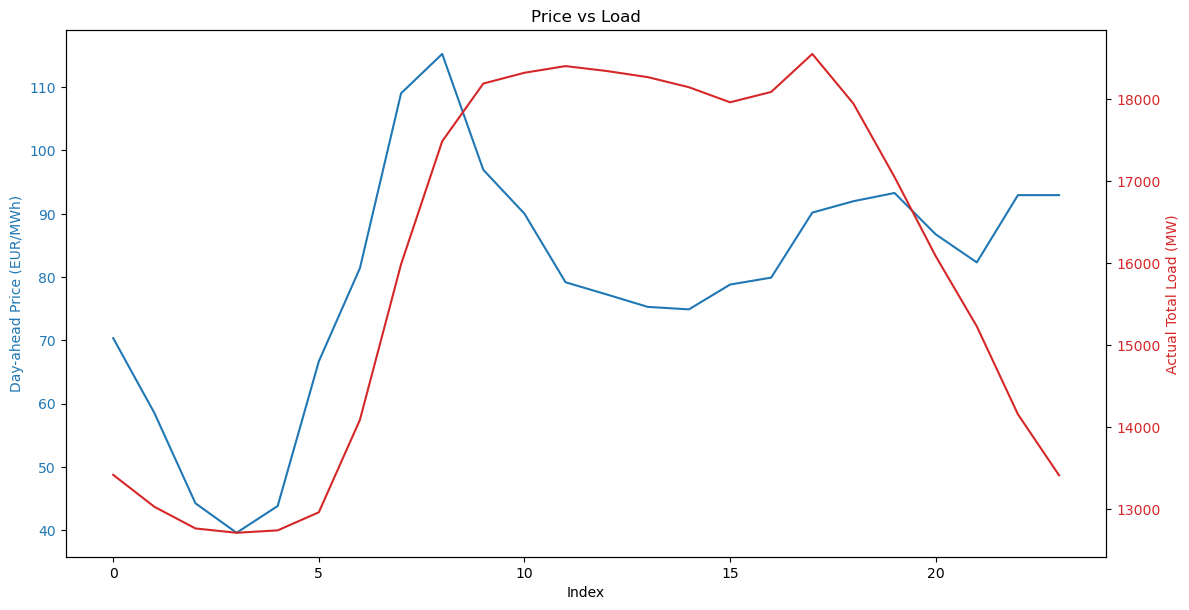

In [9]:
fig, ax1 = plt.subplots(figsize=(12,6))

x = df_market_focus.index

color = 'tab:blue'
ax1.set_xlabel('Index')  # o 'Date'
ax1.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
ax1.plot(x, df_market_focus['Day-ahead Price (EUR/MWh)'], color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Actual Total Load (MW)', color=color)
ax2.plot(x, df_market_focus['Actual Total Load (MW)'], color=color, label='Load')
ax2.tick_params(axis='y', labelcolor=color)

# Layout e titolo
fig.tight_layout()
plt.title("Price vs Load")
plt.show()

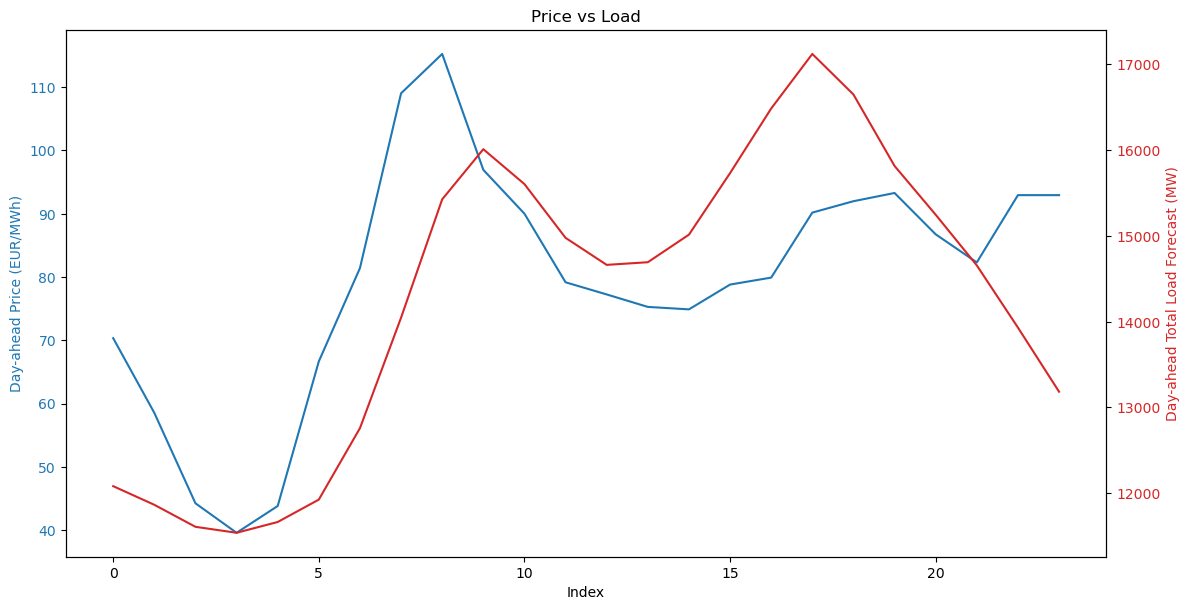

In [10]:
fig, ax1 = plt.subplots(figsize=(12,6))

x = df_market_focus.index

color = 'tab:blue'
ax1.set_xlabel('Index')  # o 'Date'
ax1.set_ylabel('Day-ahead Price (EUR/MWh)', color=color)
ax1.plot(x, df_market_focus['Day-ahead Price (EUR/MWh)'], color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Day-ahead Total Load Forecast (MW)', color=color)
ax2.plot(x, df_market_focus['Day-ahead Total Load Forecast (MW)'], color=color, label='Load')
ax2.tick_params(axis='y', labelcolor=color)

# Layout e titolo
fig.tight_layout()
plt.title("Price vs Load")
plt.show()